# Monte Carlo method for volumetric estimation of OIIP

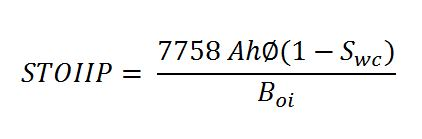

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upper val, lower val and best val (mode) taken from paper
#here 10000 iterations are used, but more the iterations, better the value
area = np.random.triangular(1500000, 2500000, 3500000, 10000).astype(int)
thickness = np.random.triangular(8, 15, 30, 10000)
porosity = np.random.triangular(0.05, 0.22, 0.35, 10000)
oil_sat = np.random.triangular(0.5, 0.75, 0.88, 10000)
b_o = np.random.uniform(1.18, 1.22, 10000)

#input into a pandas dataframe

data = {
    'Area': area,
    'Thickness': thickness,
    'Porosity': porosity,
    'Oil Saturation': oil_sat,
    'Bo': b_o
}

df = pd.DataFrame(data)

display(df.head())

,Area,Thickness,Porosity,Oil Saturation,Bo
0,2028577,14.349875,0.163370,0.610348,1.189753
1,2041932,23.667910,0.148598,0.691871,1.182620
2,2134172,15.170880,0.250703,0.731829,1.193315
3,2216128,21.397483,0.122228,0.583370,1.191805
4,2062522,20.514440,0.192172,0.577200,1.182221


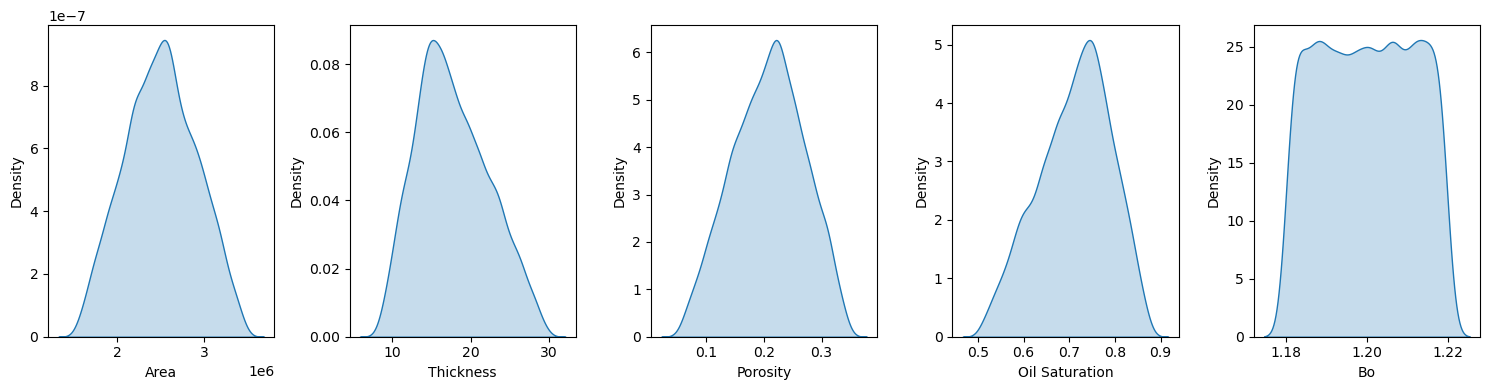

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

for i, para in enumerate(['Area', 'Thickness', 'Porosity', 'Oil Saturation', 'Bo']):
  sns.kdeplot(df[para], ax=axes[i], fill='True')
  axes[i].set_xlabel(para)
  axes[i].set_ylabel('Density')

# Adjusting layout 
plt.tight_layout()

plt.show()

In [4]:
def oiip(a, t, p, s_o, b_o):
  return 6.28981*a*t*p*s_o/b_o #cf for m3 to stb

oiip = df.apply(lambda row: oiip(row['Area'], row['Thickness'], row['Porosity'], row['Oil Saturation'], row['Bo']), axis=1)

df['Oiip'] = oiip

display(df.head())

,Area,Thickness,Porosity,Oil Saturation,Bo,Oiip
0,2028577,14.349875,0.163370,0.610348,1.189753,1.534515e+07
1,2041932,23.667910,0.148598,0.691871,1.182620,2.642605e+07
2,2134172,15.170880,0.250703,0.731829,1.193315,3.131059e+07
3,2216128,21.397483,0.122228,0.583370,1.191805,1.784444e+07
4,2062522,20.514440,0.192172,0.577200,1.182221,2.496972e+07


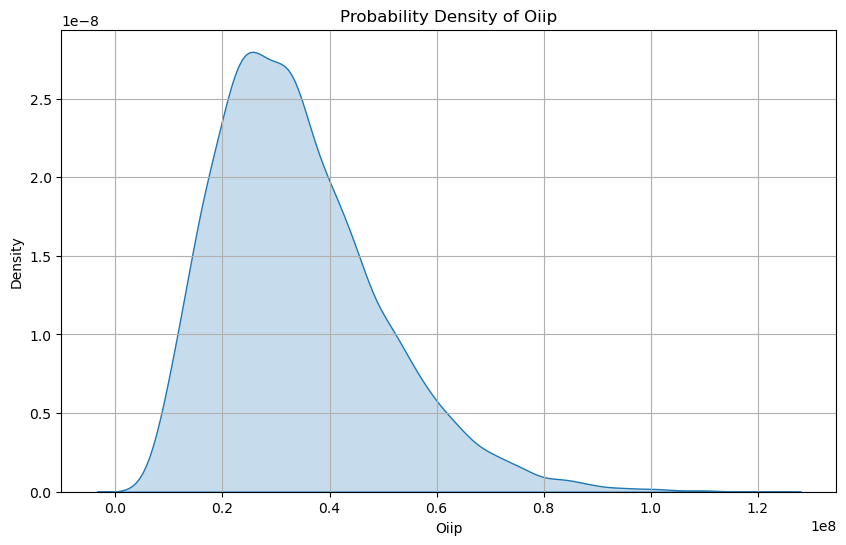

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Oiip'], fill=True)
plt.title('Probability Density of Oiip')
plt.xlabel('Oiip')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [6]:
#Now to have an estimate for the oiip value of another well in same field
new_oiip_mean = df['Oiip'].mean().astype(int)
print(f"The value with the average density is: {new_oiip_mean}")

The value with the average density is: 34184931


In [7]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(df['Oiip'])
density = kde(df['Oiip'])
oiip_maxprob = df['Oiip'][np.argmax(density)]

print(f"The value with the maximum density is: {oiip_maxprob}")

The value with the maximum density is: 25613707.665897176
